In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import skew
import math
from sklearn.model_selection import train_test_split

In [6]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
# Checking for missing values
missing_vals= df.isnull().sum()
print('Missing values per feature:\n',missing_vals[missing_vals>0])

Missing values per feature:
 Series([], dtype: int64)


In [13]:
# Checking class imbalance
print('Class dist:\n',df['Diabetes_012'].value_counts(normalize=True)*100)

Class dist:
 Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64


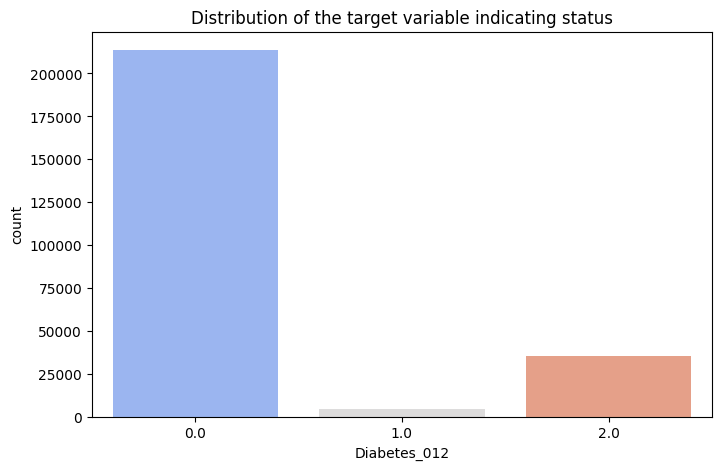

In [14]:
# Class dist for the target feature
plt.figure(figsize=(8,5))
sns.countplot(x=df['Diabetes_012'],palette='coolwarm')
plt.title('Distribution of the target variable indicating status')
plt.show()

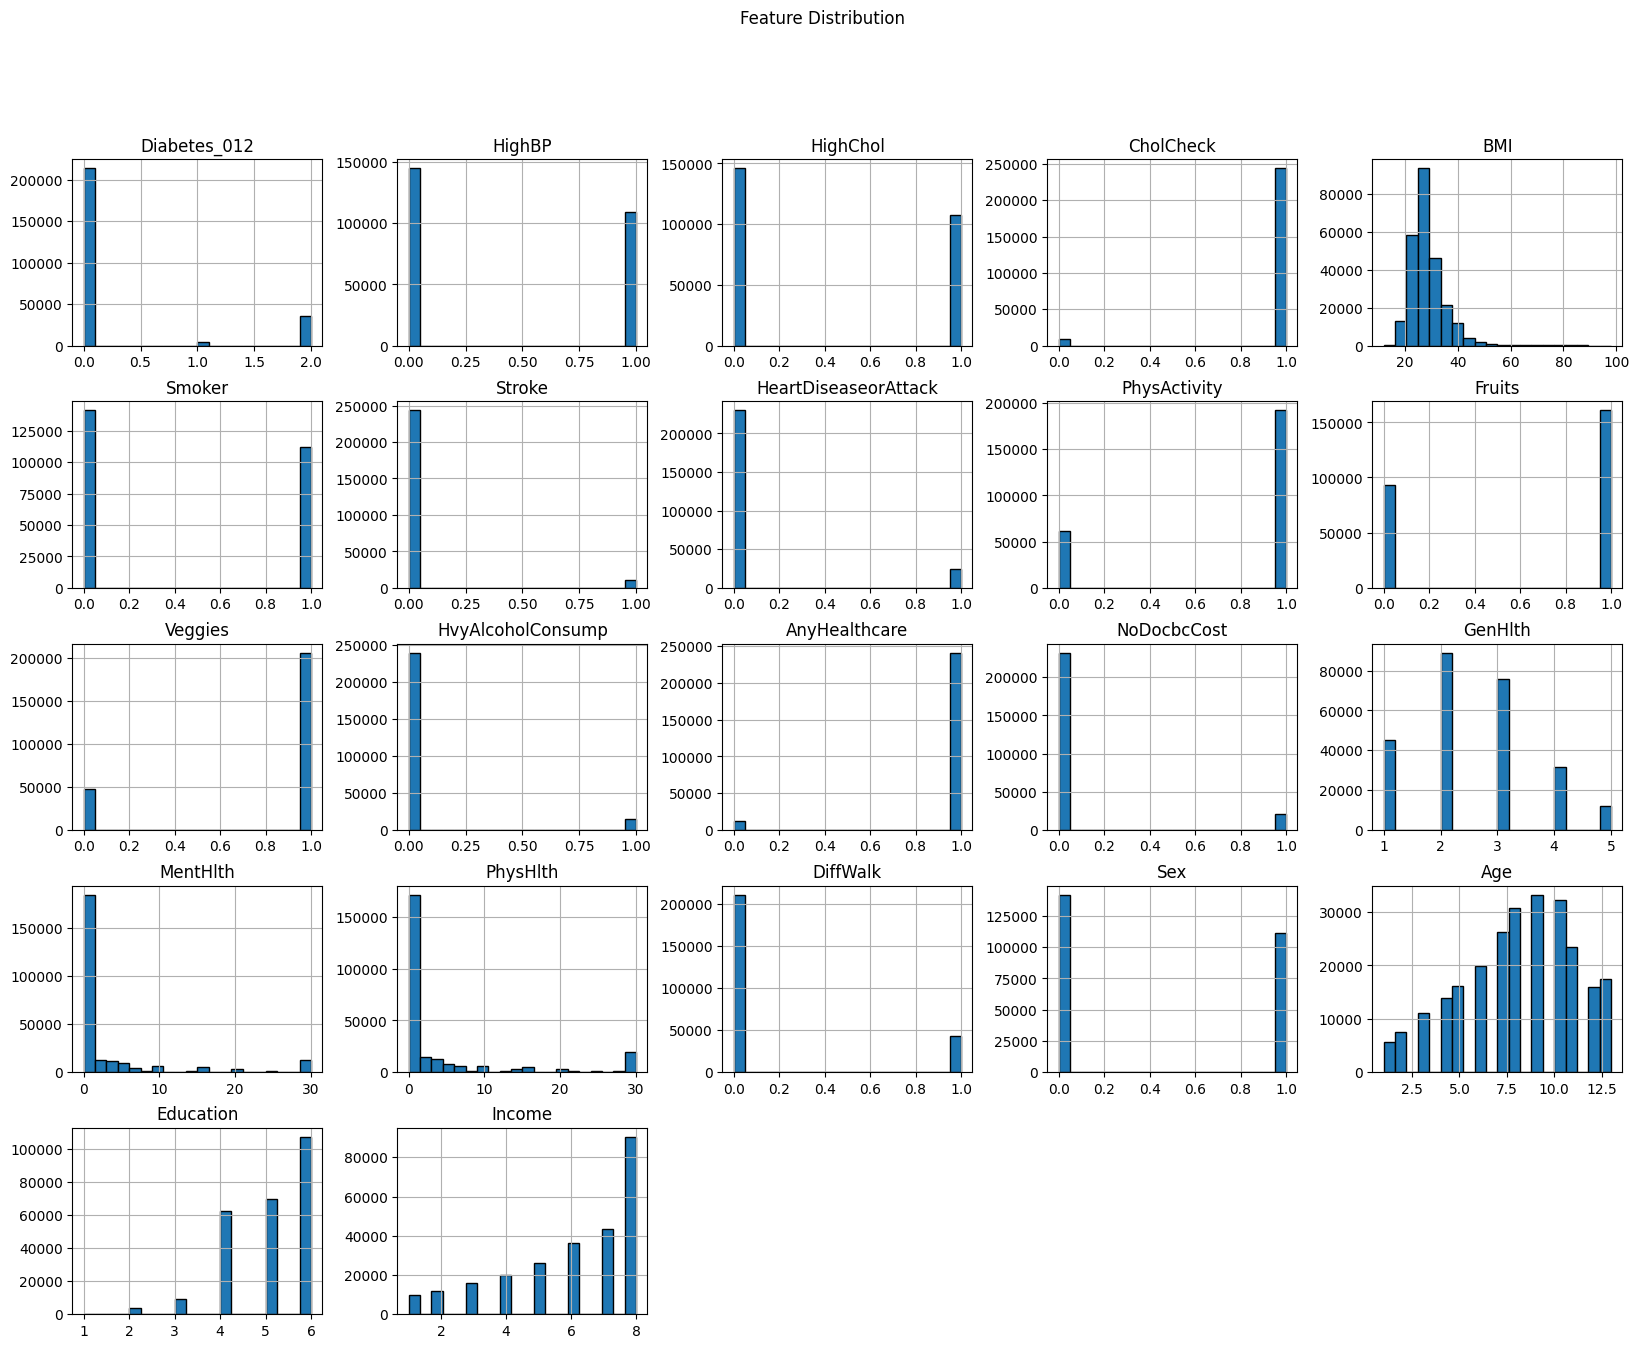

In [17]:
# Feature distributions
df.hist(figsize=(20,15),bins=20,edgecolor='black')
plt.suptitle('Feature Distribution')
plt.show()

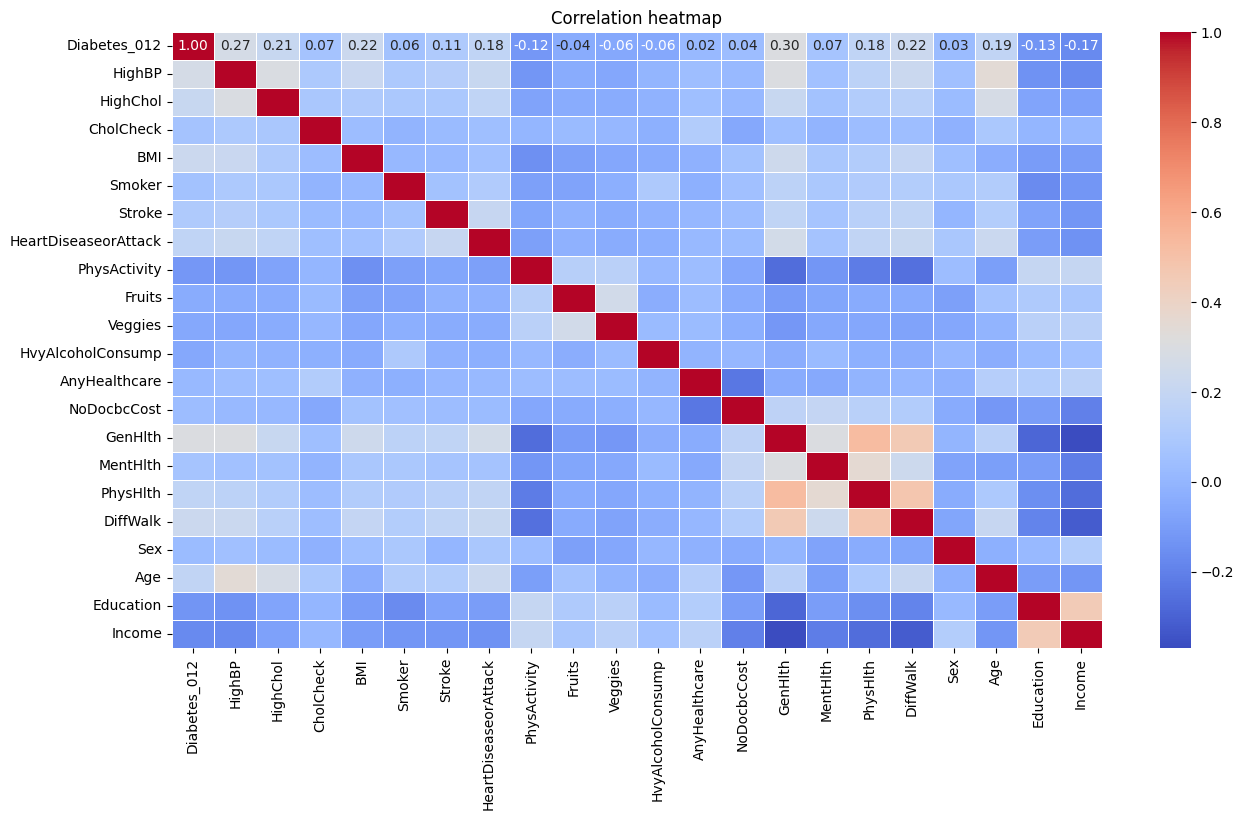

In [28]:
# Correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5,cbar=True)
plt.title('Correlation heatmap')
plt.show()

In [23]:
# Checking skewness
skewness= df.apply(lambda x :skew(x)).sort_values(ascending=False)
print('Feature Skewness:\n',skewness)

Feature Skewness:
 Stroke                  4.657312
HvyAlcoholConsump       3.854109
NoDocbcCost             2.995272
HeartDiseaseorAttack    2.778725
MentHlth                2.721132
PhysHlth                2.207382
BMI                     2.121991
Diabetes_012            1.976379
DiffWalk                1.773897
GenHlth                 0.422864
HighChol                0.307073
HighBP                  0.286903
Sex                     0.240348
Smoker                  0.228809
Age                    -0.359901
Fruits                 -0.557496
Education              -0.777251
Income                 -0.891340
PhysActivity           -1.195539
Veggies                -1.592229
AnyHealthcare          -4.181091
CholCheck              -4.881243
dtype: float64


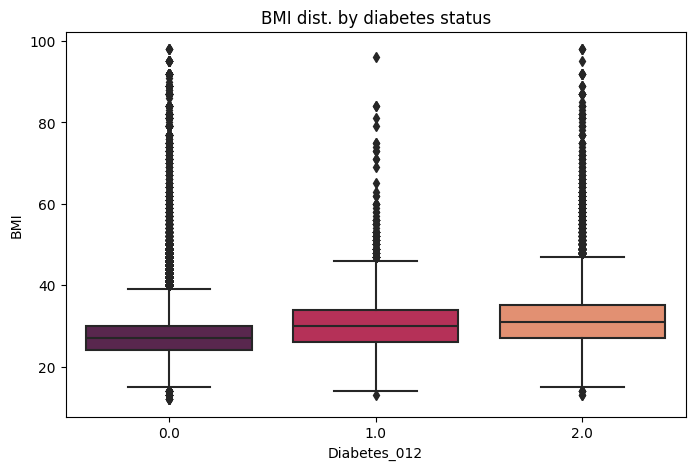

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Diabetes_012'],y=df['BMI'],palette='rocket')
plt.title('BMI dist. by diabetes status')
plt.show()

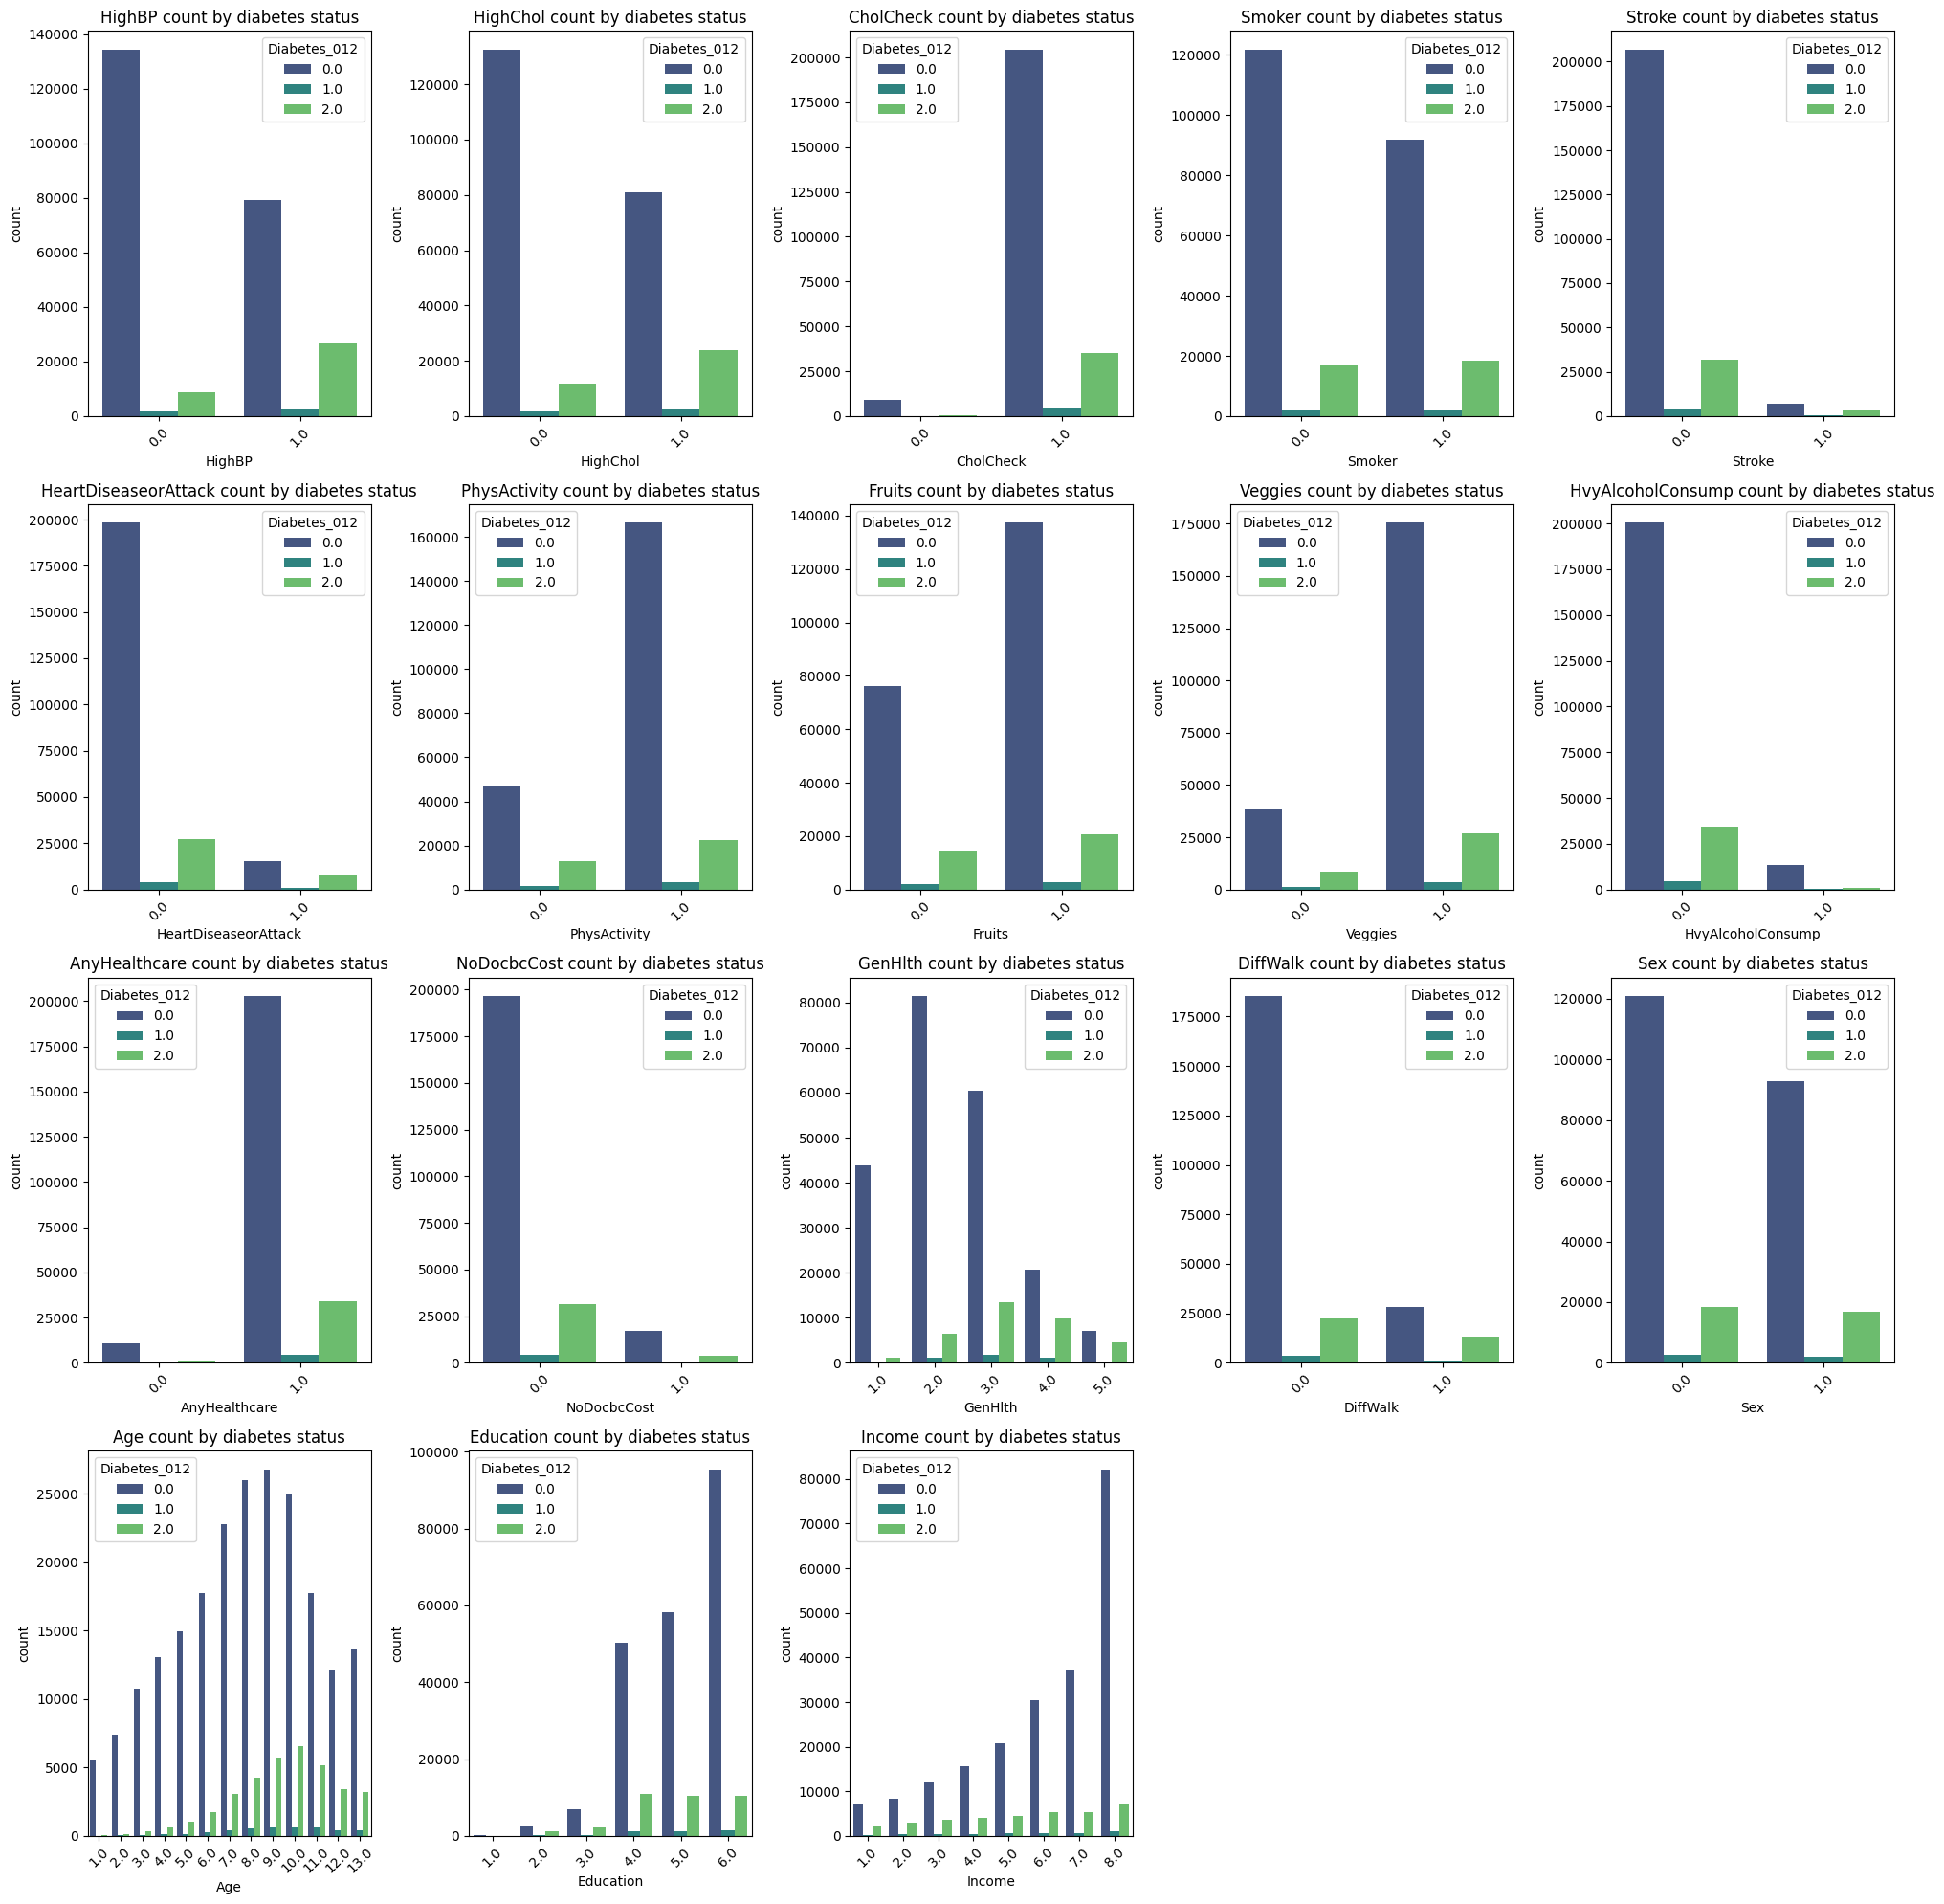

In [41]:
features=[c for c in df.columns if c not in ['Diabetes_012','MentHlth','BMI','PhysHlth']]
num_features= len(features)
cols= 5 
rows= math.ceil(num_features / cols)

fig,axes= plt.subplots(rows,cols,figsize=(20,5*rows))  
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.countplot(x=df[feature], hue=df['Diabetes_012'], palette="viridis", ax=axes[i])
    axes[i].set_title(f"{feature} count by diabetes status")
    axes[i].tick_params(axis='x', rotation=45)  
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()  
plt.show()

In [47]:
all_features= [c for c in df.columns if c!='Diabetes_012']
X= df[all_features]
y= df['Diabetes_012']
X_train,X_test,y_train,y_test= train_test_split(
    X,y,test_size=0.2,stratify=y,random_state=42
)